In [4]:
# importing libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('C:\\Users\\Sourik\\Desktop\\Data Analysis Project\\Fraud Detection using XGBoost\\PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
df.shape

(6362620, 11)

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

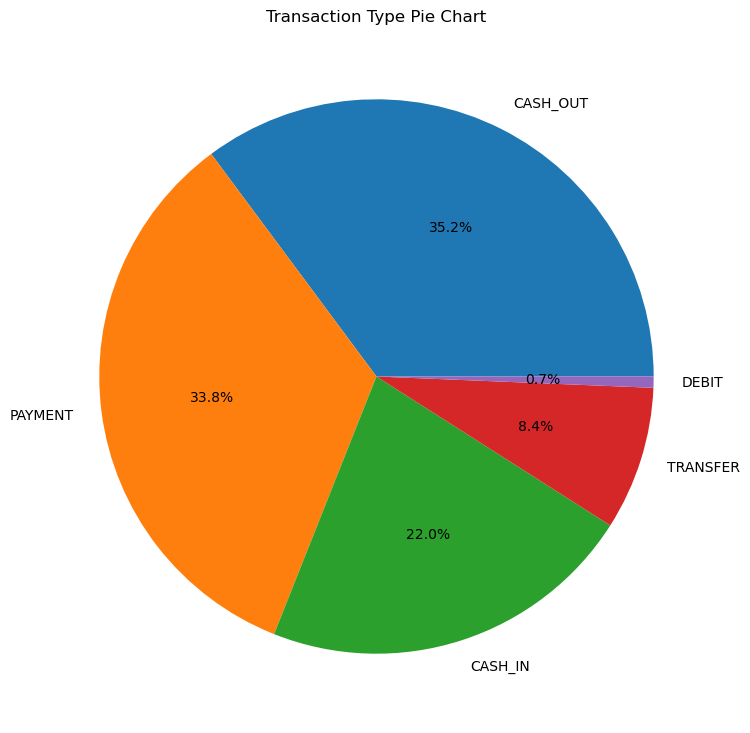

In [17]:
# Pie Chart for Transaction Types

type_counts = df['type'].value_counts()
plt.figure(figsize=(13,9))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Transaction Type Pie Chart")
plt.show()

In [25]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
labelEncode=LabelEncoder()
df['type'] = labelEncode.fit_transform(df['type'])
print(df['type'])

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int64


<AxesSubplot:>

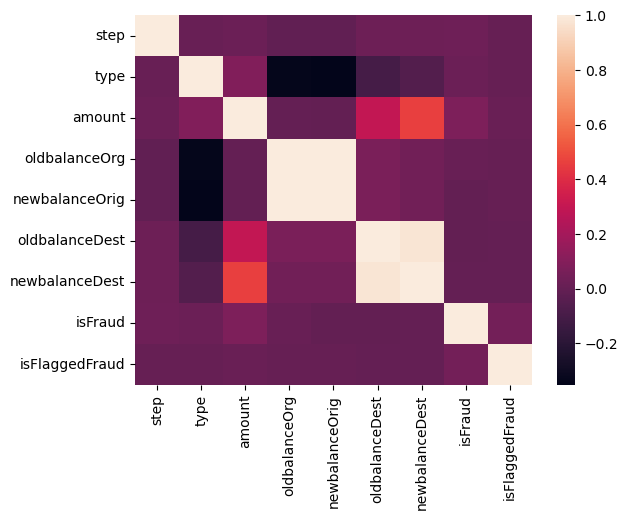

In [28]:
# Correlation between the data columns

sns.heatmap(df.corr())

In [31]:
# Importing the Machine Learning libraries

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import xgboost as xgb

In [33]:

X=df[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=df['isFraud']
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X,y)

In [34]:
# Spliting the data in Training and Testing

X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [35]:
# define the XGBoost model with L2 regularization

xgb_model = xgb.XGBClassifier(reg_alpha=1)

In [36]:
# train the XGBoost model on the training set

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
# make predictions on the test set

y_pred = xgb_model.predict(X_test)

In [41]:
# evaluate the performance of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9984983555353762

In [42]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1901433    4647]
 [   1078 1905329]]
